# 數列運算

我們先載入這個章節範例程式碼中會使用到的第三方套件、模組或者其中的部分類別、函式。

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 關於 NumPy

NumPy 是 Numerical Python 的縮寫，是 Python 使用者用來實踐向量化（Vectorization）、科學計算與資料科學的套件，也是我們進行「運算數值」的主角，資料科學團隊使用 NumPy 所提供一種稱為 `ndarray` 的資料結構來儲存並運算數值陣列、與標準套件 `random` 相輔相成的 `numpy.random` 來處理隨機性以及 `numpy.linalg` 來處理線性代數中一些繁複的運算。透過 `ndarray` 的數值陣列幾乎能夠面對任意的資料來源，包括實驗資料、圖像（表示像素亮度的二維數值陣列）或者音訊（表示強度與時間軸的一維數值陣列。）
熟悉 `ndarray` 的操作對於以 Python 應用資料科學的使用者來說是必要的前提，也扮演著理解機器學習理論的基石，如果能夠自信地操作二維數值陣列（即矩陣 Matrix）以及三維數值陣列（即張量 Tensor），將更容易理解高階機器學習框架究竟在封裝起來的函式、方法中提供了哪些功能給使用者，進而更有效率作超參數的調校。
我們可以在執行 Python 的載入指令（`import`）後印出 NumPy 的版本號來確認環境中是否安裝了 NumPy 可供使用。

In [2]:
print(np.__version__)

1.18.0


假若得到的回應是：

```
Traceback (most recent call last):
  File "<stdin>", line 1, in <module>
ModuleNotFoundError: No module named 'numpy'
```

表示目前所處的 Python 環境沒有安裝 NumPy，這時要切換回命令列安裝。

```bash
# 在命令列執行
pip install numpy
```

## 為何 NumPy

模組、套件的開發多半起源於某些痛點，就如同創新產品的問世一般；具體來說，Python 原生 `list` 的什麼特性讓科學計算使用者覺得有些麻煩呢？歸根究底就是 `list` 具備儲存異質資料型態的特性。

In [3]:
heterogeneous_list = [5566, 55.66, True, False, '5566']
for i in heterogeneous_list:
    print(type(i))

<class 'int'>
<class 'float'>
<class 'bool'>
<class 'bool'>
<class 'str'>


`list` 中每個元素都是一個完整的 Python 物件，具備各自的類別與數值資訊，這使得它在計算同質資料時的效能、語法付出代價，我們需要透過迭代將裡面的物件一一取出後運算。

In [4]:
homogeneous_list = [1, 2, 3, 4, 5]
[i**2 for i in homogeneous_list]

[1, 4, 9, 16, 25]

NumPy 的 `ndarray` 與 `list` 的最大不同在於同質資料型態的特性，在計算時的效能和語法更快速與簡潔。

In [5]:
arr = np.array([1, 2, 3, 4, 5])
arr**2

array([ 1,  4,  9, 16, 25])

`ndarray` 在同質數值陣列計算的便利性相較原生 `list` 具有絕對的優勢，接著我們來暸解如何創建 `ndarray` 以及 NumPy 的標準資料型態。

## 如何創建 `ndarray`

創建 `ndarray` 的方法有二種：一是使用 `np.array()` 將既有的 `list` 轉換成為 `ndarray`。

In [6]:
homogeneous_list = [1, 2, 3, 4, 5]
type(homogeneous_list)

list

In [7]:
arr = np.array(homogeneous_list)
print(type(arr))
print(arr)
print(arr.dtype)

<class 'numpy.ndarray'>
[1 2 3 4 5]
int64


`np.array()` 可以搭配 `dtype` 參數指定資料型態，可以傳入下列常見的資料型態：

- int ：整數型態
- float ：浮點數型態
- bool ：布林型態

In [8]:
homogeneous_list = [1, 2, 3, 4, 5]
arr = np.array(homogeneous_list, dtype=int)
arr.dtype

dtype('int64')

In [9]:
arr = np.array(homogeneous_list, dtype=float)
arr.dtype

dtype('float64')

第二種創建 `ndarray` 的方式是利用 NumPy 的多樣化函式，同樣可以搭配 `dtype` 參數，常用的創建函式有：

- `np.zeros(shape)`：創建指定外觀充滿 0 的數值陣列
- `np.ones(shape)` ：創建指定外觀充滿 1 的數值陣列
- `np.full(shape, fill_value)`：創建指定外觀充滿 fill_value 的數值陣列

In [10]:
np.zeros(5, dtype=int) # 外觀為 (5,)

array([0, 0, 0, 0, 0])

In [11]:
np.ones((2, 2), dtype=float) # 外觀為 (2, 2)

array([[1., 1.],
       [1., 1.]])

In [12]:
np.full((2, 2), 5566, dtype=int) # 外觀為 (2, 2)

array([[5566, 5566],
       [5566, 5566]])

假如需要等差、均勻間隔的數列，則可以使用下列函式：

- `np.arange(start, stop, step)`：創建從 `start`（包含）間隔 `step` 至 `stop`（不包含）的等差數列，使用方式同內建函式 `range()`
- `np.linspace(start, stop, num)` ：創建從 `start`（包含）至 `stop`（包含）的均勻切割為 `num` 個資料點的數值陣列

In [13]:
np.arange(1, 10, 2)

array([1, 3, 5, 7, 9])

In [14]:
np.linspace(1, 9, 5, dtype=int)

array([1, 3, 5, 7, 9])

最後，如果需要隨機數所組合成的數值陣列，則可以使用 `numpy.random` 中的函式：

- `np.random.random(size)`：創建指定外觀介於 0, 1 之間、並符合均勻分佈的數值陣列
- `np.random.normal(loc, scale, size)`：創建指定外觀以 `loc` 為平均數、`scale` 為標準差常態分佈的數值陣列
- `np.random.randint(low, high, size)`：創建指定外觀於 `low` （包含）到 `high`（不包含）之間隨機抽樣之正整數的數值陣列

In [15]:
uniform_arr = np.random.random(10000)
normal_arr = np.random.normal(0, 1, 10000)
randint_arr = np.random.randint(1, 7, size=6)
print(uniform_arr)
print(normal_arr)
print(randint_arr)

[0.07888432 0.85680097 0.59827821 ... 0.57373442 0.51850271 0.92199587]
[ 1.2202809  -0.42494108  0.09156555 ... -0.40549757  1.43683747
 -1.45461075]
[1 6 5 5 4 6]


這時又可以呼應「為何視覺化」一節中我們提到的，觀察原始資料對於理解其分配特性幾乎沒有幫助，需要仰賴直方圖（histogram）才能挖掘出分配的特徵。截至目前為止我們還沒有開始認識 Matplotlib，但是為了更妥善地說明，在範例程式碼中已經先引用了 Matplotlib 所提供類別或函式，假如讀者目前對這部分感到困惑，可待讀過資料探索等本書後面的章節，再回來複習。

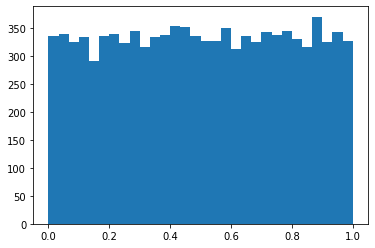

In [16]:
fig = plt.figure()
ax = plt.axes()
ax.hist(uniform_arr, bins=30)
plt.show()

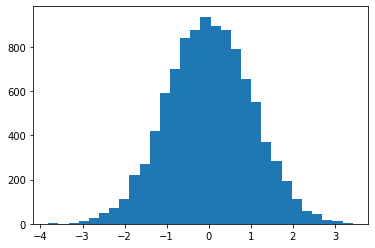

In [17]:
fig = plt.figure()
ax = plt.axes()
ax.hist(normal_arr, bins=30)
plt.show()

## 常用的 `ndarray` 屬性

`ndarray` 較常被用到的屬性有：

- `arr.ndim`：檢視 `arr` 有幾個維度
- `arr.shape`：檢視 `arr` 的外型
- `arr.size`：檢視 `arr` 的資料筆數，對一維陣列的意涵就像內建函式 `len()` 作用在 `list` 上一般
- `arr.dtype` ：檢視 `arr` 中同質資料的型態

In [18]:
arr = np.array([5, 5, 6, 6])
print(arr.ndim)
print(arr.shape)
print(arr.size)
print(arr.dtype)

1
(4,)
4
int64


## 純量、向量、矩陣與張量

我們會依照不同需求來創建不同維度的數值陣列，而這些不同維度的數值陣列各自專屬的暱稱：

- 純量：泛指沒有維度的數值
- 向量：泛指具有一個維度的數值陣列，我常喜歡用「吐司條」來比喻讓它更具體些
- 矩陣：泛指具有兩個維度的數值陣列，我常喜歡用「一片吐司」來比喻讓它更具體些
- 張量：泛指三個維度以及超過三個維度的數值陣列，我常喜歡用「多片吐司」來比喻讓它更具體些

![純量、向量、矩陣與張量](02-numpy_18_0.png)

圖片來源：<https://dev.to/juancarlospaco/tensors-for-busy-people-315k>

In [19]:
scalar = np.array(5566)
print(scalar)
print(scalar.ndim)
print(scalar.shape)

5566
0
()


In [20]:
# 吐司條
vector = np.array([5, 5, 6, 6])
print(vector)
print(vector.ndim)
print(vector.shape)

[5 5 6 6]
1
(4,)


In [21]:
# 一片 2x2 的吐司
matrix = np.array([5, 5, 6, 6]).reshape(2, 2)
print(matrix)
print(matrix.ndim)
print(matrix.shape)

[[5 5]
 [6 6]]
2
(2, 2)


In [22]:
# 三片 2x2 的吐司
tensor = np.array([5, 5, 6, 6]*3).reshape(3, 2, 2)
print(tensor)
print(tensor.ndim)
print(tensor.shape)

[[[5 5]
  [6 6]]

 [[5 5]
  [6 6]]

 [[5 5]
  [6 6]]]
3
(3, 2, 2)


NumPy 有非常豐富的內建函式可以協助我們進行常用的向量與矩陣計算。運用 `np.eye()` 可以創建單位矩陣（Identity matrix），函式命名是取 I 的諧音。

In [23]:
I = np.eye(matrix.shape[0], dtype=int)
I

array([[1, 0],
       [0, 1]])

運用 `np.dot()` 可以進行向量內積與矩陣相乘。

In [24]:
np.dot(vector, vector)

122

In [25]:
print(np.dot(matrix, I))
print(np.dot(I, matrix))

[[5 5]
 [6 6]]
[[5 5]
 [6 6]]


In [26]:
np.dot(matrix, matrix)

array([[55, 55],
       [66, 66]])

運用 `np.transpose()` 或者 `arr.T` 可以進行轉置，將外觀 `(m, n)` 矩陣轉換為 `(n, m)`，列與欄的元素互換。

In [27]:
matrix = np.arange(6).reshape(2, 3)
print(matrix)
print(np.transpose(matrix))
print(matrix.T)

[[0 1 2]
 [3 4 5]]
[[0 3]
 [1 4]
 [2 5]]
[[0 3]
 [1 4]
 [2 5]]


運用 `np.linalg.inv()` 可以求解反矩陣，反矩陣在矩陣運算中扮演的角色就像「倒數」在四則運算中一般，例如四則運算中我們想要求解 $x$ 會在等號左右兩側都乘 $a$ 的倒數。

\begin{align}
ax &= b \\
\frac{1}{a}ax &= \frac{1}{a}b\\
x &= \frac{b}{a}
\end{align}

如果在矩陣運算中想要求解 $X$，那麼就在等號左右兩側都乘上 $A$ 的反矩陣 $A^{-1}$。

\begin{align}
AX &= B \\
A^{-1}AX &= A^{-1}B \\
X &= A^{-1}B
\end{align}

In [28]:
A = np.array([1, 2, 3, 4]).reshape(2, 2)
B = np.array([5, 6, 7, 8]).reshape(2, 2)
A_inv = np.linalg.inv(A)
X = np.dot(A_inv, B)
X

array([[-3., -4.],
       [ 4.,  5.]])

## `ndarray` 的索引

從 `ndarray` 中取出單個資料值的方式與 `list` 相同，使用 `[INDEX]` 取值，索引值同樣由左至右從 0 算起，由右至左從 -1 算起，在參數命名上稱呼最左邊為起始（start）、最右邊為終止（stop）。

In [29]:
arr = np.array([55, 66, 56, 5566])
print("From start to stop:")
print(arr[0])
print(arr[1])
print(arr[2])
print(arr[arr.size - 1])
print("From stop to start:")
print(arr[-1])
print(arr[-2])
print(arr[-3])
print(arr[-arr.size])

From start to stop:
55
66
56
5566
From stop to start:
5566
56
66
55


面對二維以上的陣列，ndarray 支援使用 `[i, j, ...]` 的方式取出位於第 i 列（row）、第 j 欄（column）...的資料。

In [30]:
np.random.seed(42)
arr = np.random.randint(1, 10, size=(3, 4))
print(arr)
print(arr[1, 1])  # 3 located at (1, 1)
print(arr[2, -3]) # 4 located at (2, -3)

[[7 4 8 5]
 [7 3 7 8]
 [5 4 8 8]]
3
4


## `ndarray` 的切割

從 `ndarray` 中取出多個資料值的方式與 `list` 相同，使用 `[start:stop:step]` 取出陣列的片段，如果沒有指定 `start` 預設值 0、 `stop` 預設值 `arr.size` 意即最右邊、 `step` 預設值 1；有趣的設定是當 `step` 為 -1 時候的效果為反轉數列。

In [31]:
arr = np.arange(10, 20)
print(arr[::])   # 三個參數都預設值
print(arr[::2])  # step=2
print(arr[:5])   # stop=5, 不包含
print(arr[5:])   # start=5, 包含
print(arr[::-1]) # step=-1, 反轉

[10 11 12 13 14 15 16 17 18 19]
[10 12 14 16 18]
[10 11 12 13 14]
[15 16 17 18 19]
[19 18 17 16 15 14 13 12 11 10]


## `ndarray` 特別的索引

除了與 `list` 相同支援 `[INDEX]` 與 `[start:stop:step]` 的索引、切割方式，`ndarray` 額外支援兩種資料科學家熱愛的索引寫法：

- 華麗索引（Fancy Indexing）
- 布林索引（Boolean Indexing）

華麗索引（Fancy Indexing）指的是以陣列傳入不規則的索引值選取資料值，不用遷就 `[start:stop:step]` 所生成的規則索引陣列。

In [32]:
np.random.seed(0)
arr = np.random.randint(1, 100, size=(10,))
odd_indices = [0, 2, 8]
print(arr)
print(arr[odd_indices])

[45 48 65 68 68 10 84 22 37 88]
[45 65 37]


布林索引（Boolean Indexing）指的是以外觀相同的陣列傳入布林值，將位置為 True 的資料篩選出來。

In [33]:
is_odd = [True, False, True, False, False, False, False, False, True, False]
print(arr)
print(arr[is_odd])

[45 48 65 68 68 10 84 22 37 88]
[45 65 37]


其中外觀相同的布林值陣列 `is_odd` 因為能透過 `ndarray` 的向量化特性搭配判斷條件輕鬆產生，因此這通常是資料科學家最喜歡使用的切割、篩選方式。

In [34]:
is_odd = arr % 2 == 1
print(is_odd)
print(arr)
print(arr[is_odd])

[ True False  True False False False False False  True False]
[45 48 65 68 68 10 84 22 37 88]
[45 65 37]


## 重塑外觀

並不是所有創建 `ndarray` 的函式都可以指定外觀 (m, n, ...)，這時我們需要在初始化之後調整其外觀，常用方法有：

- `reshape(m, n, ...)`
- `ravel()`

運用方法 `arr.reshape(m, n, ...)` 將數值陣列 `arr` 重塑成運算所需要的外觀。

In [35]:
arr = np.arange(1, 10)
print(arr)
print(arr.shape)
print(arr.reshape(3, 3))
print(arr.reshape(3, 3).shape)

[1 2 3 4 5 6 7 8 9]
(9,)
[[1 2 3]
 [4 5 6]
 [7 8 9]]
(3, 3)


重塑時需要指定 (m, n, ...) 外觀，更便捷的寫法是將其餘 `ndim — 1` 個維度指定好，再傳最後一個維度是 -1，`ndarray` 會自行計算最後一個維度的值；例如將長度為 9 的數值陣列 `arr` 重塑成 (3, 3) 外觀時可以寫作 `arr.reshape(3, -1)` 或者 `arr.reshape(-1, 3)`。

In [36]:
arr = np.arange(1, 10)
print(arr.reshape(3, -1))
print(arr.reshape(-1, 3))

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1 2 3]
 [4 5 6]
 [7 8 9]]


在矩陣相乘運算的應用場景中，我們常需要將一維的數值陣列重塑成二維的欄（尚未轉置的向量 $v$）或者二維的列（已轉置的向量 $v^T$），這時就可以善用 `arr.reshape(1, -1)` 或 `arr.reshape(-1, 1)`。

In [37]:
arr = np.arange(1, 4)
print(arr.reshape(-1, 1)) # 重塑成二維的欄
print(arr.reshape(1, -1)) # 重塑成二維的列

[[1]
 [2]
 [3]]
[[1 2 3]]


運用方法 `ravel()` 可以將外觀為 (m, n, ...) 的數值陣列調整回一維。

In [38]:
arr = np.arange(1, 10).reshape(3, 3)
print(arr.shape)
print(arr.ndim)
print(arr.ravel().shape)
print(arr.ravel().ndim)

(3, 3)
2
(9,)
1


## 複製陣列

`ndarray` 有一個重要的預設特性為「不複製」，不論在切割或重新宣告的情境中都是創建陣列的 View，而非複製另一個陣列，這代表著對以 View 存在的子陣列（Sub-array）更新會改動到原始陣列。例如將 `arr` 的 View `mat` 之中的 5 更新為 5566，會一併更新 `arr` 的 5 為 5566。

In [39]:
arr = np.arange(1, 10)
mat = arr.reshape(3, 3)
mat[1, 1] = 5566
print(mat)
print(arr)

[[   1    2    3]
 [   4 5566    6]
 [   7    8    9]]
[   1    2    3    4 5566    6    7    8    9]


我們若希望實踐陣列的複製，可以運用其 `copy()` 方法，如此一來 `mat` 之中的 5 更新為 5566，並不會影響到 `arr` 中的 5。

In [40]:
arr = np.arange(1, 10)
mat = arr.copy()
mat = mat.reshape(3, 3)
mat[1, 1] = 5566
print(mat)
print(arr)

[[   1    2    3]
 [   4 5566    6]
 [   7    8    9]]
[1 2 3 4 5 6 7 8 9]


## 合併陣列

很多 NumPy 的函式都有提供 `axis` 參數能夠讓使用者在進行這些操作時能夠輕鬆地應用在列（row）或欄（column）等不同維度上，暸解 `axis` 參數可以有效幫助使用者處理陣列，我們能夠運用 `np.concatenate([arr0, arr1, ...], axis)` 將多個陣列依照 `axis` 參數的方向進行合併，當 `axis` 為預設值 0 的時候效果為垂直合併、當 `axis=1` 的時候效果為水平合併。

In [41]:
arr_a = np.arange(1, 5).reshape(2, 2)
arr_b = np.arange(5, 9).reshape(2, 2)
print(np.concatenate([arr_a, arr_b]))         # 預設 axis=0
print(np.concatenate([arr_a, arr_b], axis=1)) # axis=1

[[1 2]
 [3 4]
 [5 6]
 [7 8]]
[[1 2 5 6]
 [3 4 7 8]]


## 通用函式

NumPy 之所以被譽為 Python 資料科學應用的基石，就是因為能透過通用函式（Universal function）實踐其他科學計算語言內建的向量化（Vectorization）功能，通用函式的作用是針對數值陣列中每個數值進行相同的運算，效率會高於使用迭代語法。我們可以在 Jupyter Notebook 中使用 `%timeit` 得知若想以迭代對一百萬筆隨機整數進行「倒數」的運算要花多少時間。

In [42]:
long_arr = np.random.randint(1, 101, size=1000000)
%timeit [1/i for i in long_arr]

416 ms ± 49.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


較為緩慢的原因是在每次迭代計算倒數時，Python 首先檢查物件類型再呼叫用於該類型的正確運算（在這個例子中為倒數運算）。而使用 `ndarray` 的通用函式，就像是利用已經編譯過的程式並且對固定物件類型計算，無需再檢查，運算的效率較高。

In [43]:
long_arr = np.random.randint(1, 101, size=1000000)
%timeit np.divide(1, long_arr)

1.61 ms ± 256 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


基礎的通用函式與純量的數值運算符不謀而合，可依使用者的喜好選擇通用函式或者運算符：

- `np.add()`：同 `+` 運算符
- `np.subtract()`：同 `-` 運算符
- `np.multiply()`：同 `*` 運算符
- `np.divide()`：同 `/` 運算符
- `np.power()`：同 `**` 運算符
- `np.floor_divide()`：同 `//` 運算符
- `np.mod()`：同 `%` 運算符

In [44]:
# 以 np.power 作為一個簡單示範
arr = np.arange(9)
print(arr)
print(arr**2)
print(np.power(arr, 2))

[0 1 2 3 4 5 6 7 8]
[ 0  1  4  9 16 25 36 49 64]
[ 0  1  4  9 16 25 36 49 64]


假如希望對數值陣列應用之通用函式是為自己的需求量身訂製，這時可以定義後以 `np.vectorize()` 轉換為一個通用函式，例如可以判斷一個輸入是否為質數，我們想轉換成通用函式藉此判斷數值陣列中哪些為質數。

In [45]:
def is_prime(x):
    div_cnt = 0
    for i in range(1, x+1):
        if x % i == 0:
            div_cnt += 1
        if div_cnt > 2:
            break
    return div_cnt == 2

is_prime_ufunc = np.vectorize(is_prime)
arr = np.arange(1, 12)
print("是否為質數：")
print(is_prime_ufunc(arr))

是否為質數：
[False  True  True False  True False  True False False False  True]


## 聚合函式

面對一筆陌生的數值資料，資料科學家會採取描述性統計探索這筆資料，例如平均值、標準差、總和、中位數、最小值、最大值、眾數或分位數等，能夠將長度超過 1 的數值陣列匯總為一個或少數幾個摘要統計指標，被泛稱為聚合函式（Aggregate functions）。通用與聚合函式最大的差異就在於輸入與輸出的數值陣列長度，不同於通用函式，聚合函式所輸出的數值陣列多數僅有長度 1，或遠小於輸入數值陣列的長度。
基礎的 NumPy 聚合函式可以應用於獲得數值陣列的各種描述性統計，我們不需要一一詳細討論如何使用，只需要注意兩個特性：

1. 能沿指定維度聚合
2. 多數具有可運算遺漏值的相對應函式

「能沿指定維度聚合」的特性意指在面對具有多個維度的數值陣列時，可以指定應用在某一個維度，舉例來說面對有兩個維度 (m, n) 的矩陣時可以單純應用 `np.sum()` 將整個矩陣中的數值加總，將得到一個輸出；如果指定 `axis=0` 則是將矩陣中的每欄（column）分別加總，將得到 n 個輸出、指定 `axis=1` 則是將矩陣中的每列（row）分別加總，將得到 m 個輸出。

In [46]:
mat = np.arange(1, 16).reshape(3, 5)
print(np.sum(mat))         # 1 個輸出
print(np.sum(mat, axis=0)) # 5 個輸出
print(np.sum(mat, axis=1)) # 3 個輸出

120
[18 21 24 27 30]
[15 40 65]


「多數具有可運算遺漏值的相對應函式」的特性意指在面對具有 `np.NaN` 遺漏值的陣列時，原型聚合函式會回傳 `np.NaN`，這時可以採用相對應之可計算遺漏值函式運算，將會忽略 `np.NaN` ，傳回其餘數值的摘要。

In [47]:
arr = np.arange(1, 16, dtype=float)
arr[-1] = np.NaN
print(arr)
print(np.sum(arr))
print(np.nansum(arr))

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. nan]
nan
105.0


常用聚合函式與 nan 對應有：

- `np.sum()` 與 `np.nansum()`
- `np.prod()` 與 `np.nanprod()`
- `np.mean()` 與 `np.nanmean()`
- `np.median()` 與 `np.nanmedian()`
- `np.std()` 與 `np.nanstd()`
- `np.var()` 與 `np.nanvar()`
- `np.min()` 與 `np.nanmin()`
- `np.max()` 與 `np.nanmax()`
- `np.argmin()` 與 `np.nanargmin()`
- `np.argmax()` 與 `np.nanargmax()`

我們創建一個外觀 `(10, 2)` 的矩陣來示範其中一個聚合函式 `np.argmax()` 的使用方法。

In [48]:
np.random.seed(42)
arr_0 = np.random.random((10, 1))
arr_1 = 1 - arr_0
arr = np.concatenate([arr_0, arr_1], axis=1)
arr

array([[0.37454012, 0.62545988],
       [0.95071431, 0.04928569],
       [0.73199394, 0.26800606],
       [0.59865848, 0.40134152],
       [0.15601864, 0.84398136],
       [0.15599452, 0.84400548],
       [0.05808361, 0.94191639],
       [0.86617615, 0.13382385],
       [0.60111501, 0.39888499],
       [0.70807258, 0.29192742]])

In [49]:
np.argmax(arr, axis=0) # 矩陣中的每欄最大值所處的列數

array([1, 6])

In [50]:
np.argmax(arr, axis=1) # 矩陣中的每列最大值所處的欄數

array([1, 0, 0, 0, 1, 1, 1, 0, 0, 0])

## 延伸閱讀

1. NumPy: Learn (https://numpy.org/learn/)
2. Introduction to NumPy. In: Jake VanderPlas, Python Data Science Handbook (https://jakevdp.github.io/PythonDataScienceHandbook/02.00-introduction-to-numpy.html) 